In [1]:
# Setup
%pylab inline
import matplotlib
import numpy as np
from PIL import Image

Populating the interactive namespace from numpy and matplotlib


(640, 480)


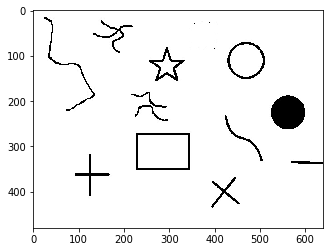

In [2]:
# Open Image
filename = '../spatial/sobel.jpg'
im = Image.open(filename)
print(im.size)
matplotlib.pyplot.imshow(im) # Check that image loaded properly

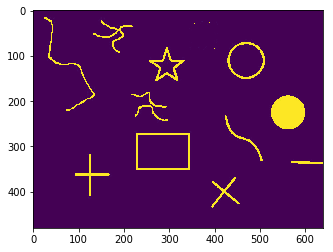

In [3]:
# Image Prep
im = np.array(im) # Change to Numpy Array
im = im[:,:,0] # From RGB to Grayscale
im = np.invert(im) # Invert Colors
matplotlib.pyplot.imshow(im) # Make sure numpy inverted colors

## Rotation Algorithm 1

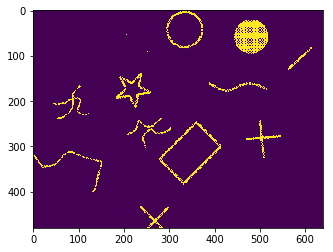

In [9]:
ang = 45 # Degrees
h, w = im.shape # Numpy puts out the image axes in the wrong order
cx = w / 2
cy = h / 2
theta = ang * 3.14 / 180
rotmat = np.array([[np.cos(theta), -np.sin(theta), 0],
                [np.sin(theta), np.cos(theta), 0],
                [0, 0, 1]])
new_im = np.zeros((h, w))
for i in range(w):
    for j in range(h):
        oldx = i - cx
        oldy = (h-j) - cy
        vec = np.matmul(rotmat, np.array([[oldx],[oldy],[0]]))
        newx = round(vec[0][0] + cx)
        newy = round(cy-vec[1][0])
        if newx >= 0 and newx < w and newy >= 0 and newy < h:
            new_im[newy][newx] = im[j][i]
matplotlib.pyplot.imshow(new_im) # Make sure numpy inverted colors

This seems to leave gaps, which makes sense. Something to improve on.

## Rotation Algorithm 2
Instead of going pixel by pixel of the old image, and rotating that, now it will go pixel by pixel for the new image and find the closest pixel from the old image to sample. This should remove the gaps from Rotation Algorithm 1.

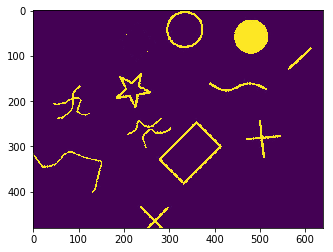

In [6]:
ang = 45 # Degrees
h, w = im.shape # Numpy puts out the image axes in the wrong order
cx = w / 2
cy = h / 2
theta = ang * 3.14 / 180
ang = -theta
rotmat = np.array([[np.cos(ang), -np.sin(ang), 0],
                [np.sin(ang), np.cos(ang), 0],
                [0, 0, 1]])
new_im = np.zeros((h, w))
for i in range(w):
    for j in range(h):
        newx = i - cx
        newy = (h-j) - cy
        vec = np.matmul(rotmat, np.array([[newx],[newy],[0]]))
        oldx = round(vec[0][0] + cx)
        oldy = round(cy-vec[1][0])
        if oldx >= 0 and oldx < w and oldy >= 0 and oldy < h:
            new_im[j][i] = im[oldy][oldx]
matplotlib.pyplot.imshow(new_im) # Make sure numpy inverted colors